## 8.1 합성곱 신경망 소개

8-1 간단한 컨브넷 만들기

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 4, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

8-2 모델의 summary() 메소드출력

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 4)         1156      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         4736  

8-3 MNIST 이미지 컨브넷에서 훈련하기

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 53ms/step - loss: 0.2596 - accuracy: 0.9194
Epoch 2/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0755 - accuracy: 0.9765
Epoch 3/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0527 - accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0373 - accuracy: 0.9882


8-4 컨브넷 평가하기

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 4s 9ms/step - loss: 0.0375 - accuracy: 0.9886
테스트 정확도: 0.989


8-5 최대풀링 층이 빠진 잘못된 구조의 컨브넷

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

캐글 데이터셋 내려받기

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaehyeongkim","key":"680a216f91833c1999382ae7121e6353"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:04<00:00, 192MB/s]
100% 812M/812M [00:04<00:00, 179MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

코드 8-6 이미지를 훈련, 검증, 테스트 디렉터리로 복사하기

In [7]:
import os, shutil, pathlib

In [8]:
original_dir = pathlib.Path("train")  # 원본 데이터셋이 압축 해제되어 있는 디렉터리 경로
new_base_dir = pathlib.Path("cats_vs_dogs_small")  # 서브셋 저장할 디렉터리

def make_subset(subset_name, start_index, end_index):  # start idx ~ end idx까지 new_base_dir/(subset_name)/catordog로 복사하기 위한 유틸리티 함수
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir / fname,
                      dst=dir / fname)

In [9]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

8-7 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))  # 180x180 크기의 RGB 이미지
x = layers.Rescaling(1./255)(inputs)  # 입력을 나누기 255 해서 [0, 1] 범위로 스케일 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

8-8 모델 훈련 설정하기

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

8-9 image_dataset_from_directory를 사용하여 이미지 읽기

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


8-10 Dataset이 반환하는 데이터와 레이블 크기 확인하기

In [12]:
for data_batch, labels_batch in train_dataset:
  print("데이터 배치 크기: ", data_batch.shape)
  print("레이블 배치 크기: ", labels_batch.shape)
  break

데이터 배치 크기:  (32, 180, 180, 3)
레이블 배치 크기:  (32,)


8-11 Dataset을 사용하여 모델 훈련하기

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 236s 4s/step - loss: 0.7019 - accuracy: 0.5135 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 210s 3s/step - loss: 0.6995 - accuracy: 0.5510 - val_loss: 0.6617 - val_accuracy: 0.6290
Epoch 3/30
63/63 [==============================] - 183s 3s/step - loss: 0.6841 - accuracy: 0.5770 - val_loss: 0.6678 - val_accuracy: 0.6180
Epoch 4/30
63/63 [==============================] - 199s 3s/step - loss: 0.6697 - accuracy: 0.5995 - val_loss: 0.6990 - val_accuracy: 0.5160
Epoch 5/30
63/63 [==============================] - 201s 3s/step - loss: 0.6439 - accuracy: 0.6370 - val_loss: 0.5853 - val_accuracy: 0.6820
Epoch 6/30
63/63 [==============================] - 194s 3s/step - loss: 0.6034 - accuracy: 0.6785 - val_loss: 0.6578 - val_accuracy: 0.6240
Epoch 7/30
63/63 [==============================] - 193s 3s/step - loss: 0.5779 - accuracy: 0.6930 - val_loss: 0.6055 - val_accuracy: 0.6740
Epoch 8/30
63

8-12 훈련과정의 정확도와 손실 그래프 그리기

In [13]:
import matplotlib.pyplot as plt

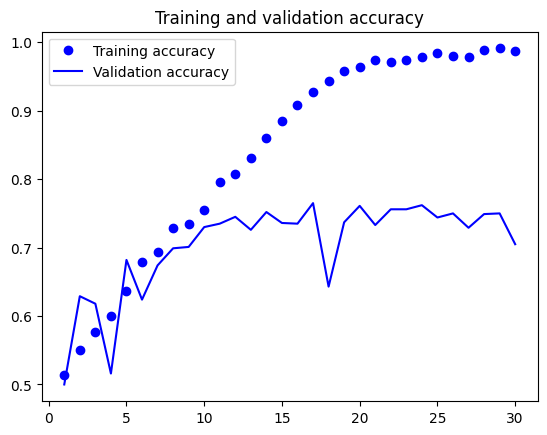

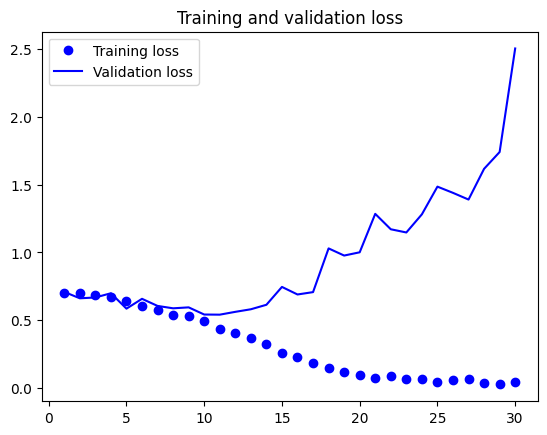

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

8-13 테스트 세트에서 모델 평가하기

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 49s 766ms/step - loss: 0.5589 - accuracy: 0.7390
테스트 정확도: 0.739


8-14 컨브넷에 추가할 데이터 증식 단계 정의하기

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

8-15 랜덤하게 증식된 훈련 이미지 출력하기

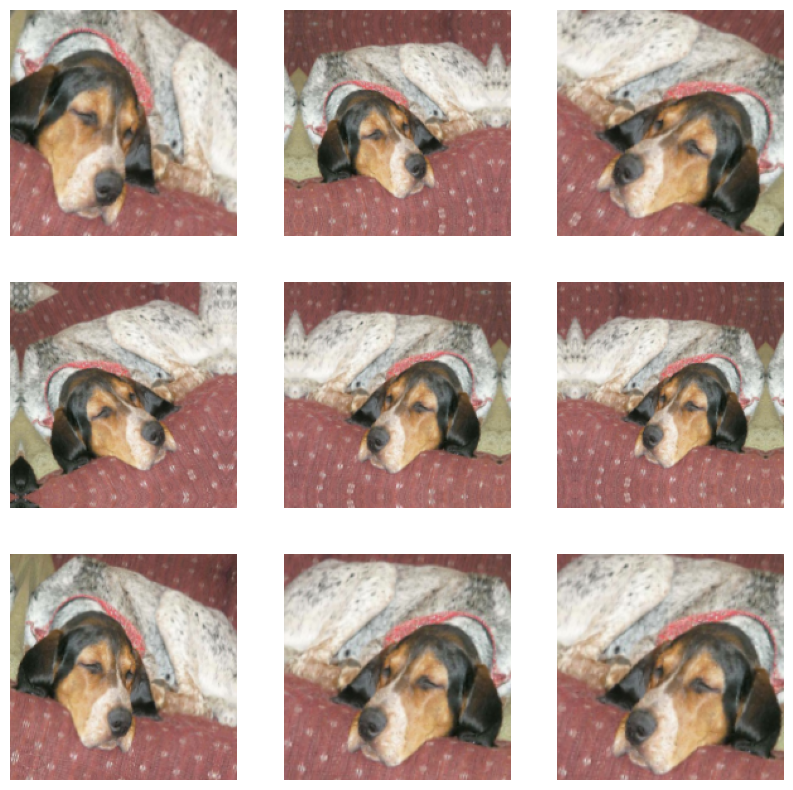

In [15]:
plt.figure(figsize=(10,10))

for images, _ in train_dataset.take(1):  # take(N): N개의 배치만 샘플링
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))  # 배치 출력에서 첫번째 이미지 출력, 같은 이미지를 9번 반복하는동안 매번 다른 증식 결과
    plt.axis("off")

8-16 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기

In [18]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

8-17 규제를 추가한 컨브넷 훈련하기

In [22]:
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch_with_augmentation.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
# history = model.fit(
#     train_dataset,
#     epochs=100,
#     validation_data=validation_dataset,
#     callbacks=callbacks)

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 214s 3s/step - loss: 0.7023 - accuracy: 0.5140 - val_loss: 0.6911 - val_accuracy: 0.5300
Epoch 2/30
63/63 [==============================] - 204s 3s/step - loss: 0.6945 - accuracy: 0.5325 - val_loss: 0.6916 - val_accuracy: 0.5090
Epoch 3/30
63/63 [==============================] - 203s 3s/step - loss: 0.6931 - accuracy: 0.5530 - val_loss: 0.6650 - val_accuracy: 0.6170
Epoch 4/30
63/63 [==============================] - 201s 3s/step - loss: 0.6755 - accuracy: 0.5890 - val_loss: 0.6527 - val_accuracy: 0.6360
Epoch 5/30
63/63 [==============================] - 205s 3s/step - loss: 0.6714 - accuracy: 0.5975 - val_loss: 0.6653 - val_accuracy: 0.6150
Epoch 6/30
63/63 [==============================] - 200s 3s/step - loss: 0.6433 - accuracy: 0.6215 - val_loss: 0.6255 - val_accuracy: 0.6480
Epoch 7/30
63/63 [==============================] - 198s 3s/step - loss: 0.6126 - accuracy: 0.6715 - val_loss: 0.6219 - val_accuracy: 0.6410
Epoch 8/30
63

8-18 테스트 세트에서 모델 훈련하기

In [26]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc: .3f}")

63/63 [==============================] - 55s 855ms/step - loss: 0.4652 - accuracy: 0.7850
테스트 정확도:  0.785


8-19 VGG16 합성곱 기반 층 만들기

In [28]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

8-20 VGG16 특성과 해당 레이블 추출하기

In [30]:
import numpy as np

In [31]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [34]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 5s 5s/step


8-21 밀집 연결 분류기 정의하고 훈련하기

In [37]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.x",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 5s 65ms/step - loss: 17.6584 - accuracy: 0.9220 - val_loss: 4.8313 - val_accuracy: 0.9660
Epoch 2/20
63/63 [==============================] - 3s 52ms/step - loss: 2.5156 - accuracy: 0.9775 - val_loss: 3.5307 - val_accuracy: 0.9750
Epoch 3/20
63/63 [==============================] - 3s 42ms/step - loss: 0.8826 - accuracy: 0.9905 - val_loss: 6.7619 - val_accuracy: 0.9640
Epoch 4/20
63/63 [==============================] - 3s 48ms/step - loss: 2.6586 - accuracy: 0.9835 - val_loss: 4.3689 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 4s 62ms/step - loss: 1.6882 - accuracy: 0.9915 - val_loss: 6.1748 - val_accuracy: 0.9680
Epoch 6/20
63/63 [==============================] - 3s 43ms/step - loss: 1.0937 - accuracy: 0.9940 - val_loss: 4.8170 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 3s 42ms/step - loss: 0.6432 - accuracy: 0.9945 - val_loss: 9.2039 - val_accuracy: 0.9600
Epoch 8/20
6

8-22 결과를 그래프로 그리기

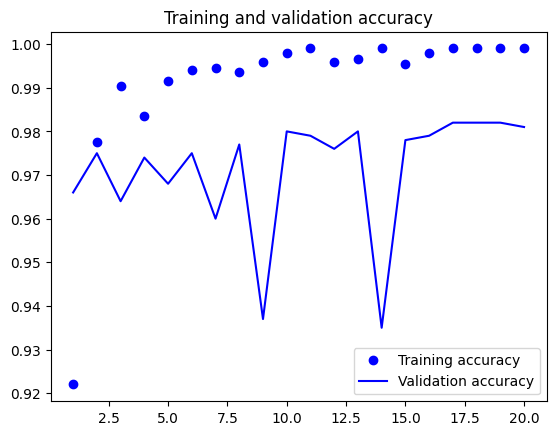

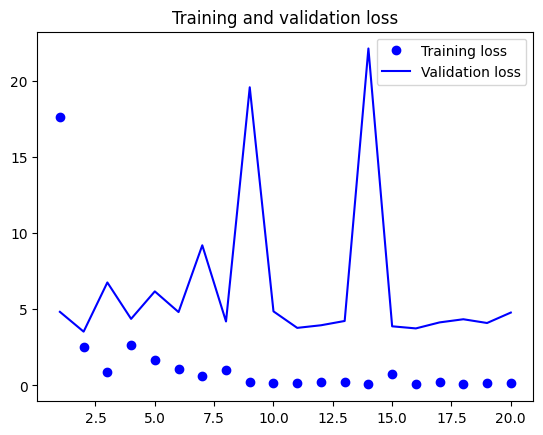

In [40]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

8-23 VGG16 합성곱 기반 층을 만들고 동결하기

In [41]:
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False)
conv_base.trainable = False

8-24 동결하기 전과 후에 훈련 가능한 가중치 리스트 출력하기

In [42]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수", len(conv_base.trainable_weights))
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수", len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수 26
합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수 0


8-25 데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기

In [44]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [49]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

8-26 테스트 세트에서 모델 평가하기

In [50]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

8-27 마지막에서 네번째 층까지 모든 층 동결하기

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

8-28 모델 미세 조정하기

In [ ]:
model.compile(loss="binary_crossentropy",
             optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
             metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.keras",
    save_best_only=True,
    monito="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks=callbacks)

In [ ]:
# 테스트 모델 정확도
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")